# Looking at the angle (zRotation)

In [1]:
%matplotlib inline

import os
from collections import Counter

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from bb_binary import FrameContainer, Repository

matplotlib.rc("figure", figsize=(12,6))
sns.set_style("white")

repo = Repository("/Users/alexa/Projects/bees-sna/2015/")

In [3]:
positions = []
tmp_count = 0
frame_count = 0
detection_counts = []
rotation = []

for frame, detection in repo.iter_frames():
    frame_count = frame_count + 1
    for detection in frame.detectionsUnion.detectionsDP:
        tmp_count += 1
        positions.append((detection.xpos, detection.ypos))
        rotation.append(detection.zRotation)
    detection_counts.append(tmp_count)
    tmp_count = 0

## Detections Stats

In [4]:
a = np.array(detection_counts)
average = np.average(a)
print("Average: {}".format(average))
print("Max: {}".format(np.max(a)))
print("Min: {}".format(np.min(a)))
print("Mean: {}".format(np.mean(a)))
print("Median: {}".format(np.median(a)))

Average: 88.2763671875
Max: 98
Min: 78
Mean: 88.2763671875
Median: 88.0


## Rotations Stats

In [5]:
b = np.array(rotation)
print("Max: {}".format(np.max(b)))
print("Min: {}".format(np.min(b)))
positions = np.array(positions)
print("Anzahl der Positionen: {}".format(len(positions)))

Max: 3.141545534133911
Min: -3.1415843963623047
Anzahl der Positionen: 90395


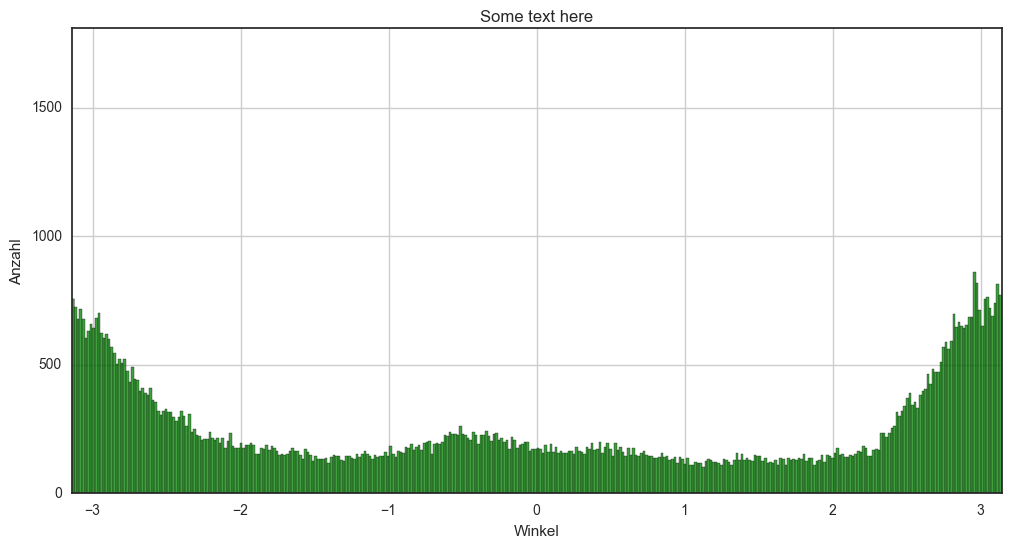

In [8]:
# the histogram of the data
n, bins, patches = plt.hist(rotation, 360, normed=False, facecolor='green', alpha=0.75)

plt.xlabel('Winkel')
plt.ylabel('Anzahl')
plt.title('Some text here')
plt.axis([-np.pi, np.pi, 0, len(positions)/50])
plt.grid(True)

plt.show()

In [1]:
N = 360
bottom = 200
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = n
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.show()

print(theta)

NameError: name 'np' is not defined